### MODS 205 - Digital Finance
---
**Professor:** Patrick Waelbroeck

**Students:**

Yuri DE SENE ALVIZI

Arthur MARTINS BRAGA

#### Question 1
Comment on the article “Crypto’s Richest Rebel” from Fortune April/May 2022 available on the e-campus website using all keywords and concepts covered in the course.

#### Question 2
Comment on the article “Binance CEO Changpeng Zhao charged with money laundering” from Fortune Website 2023-11-23 available on the e-campus website using all keywords and concepts covered in the course


#### Question 3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


3.1. Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.


In [3]:
bnpa_df = pd.read_csv('BN.PA.csv')
cappa_df = pd.read_csv('CAP.PA.csv')
fchi_df = pd.read_csv('^FCHI.csv')
irx_df = pd.read_csv('^IRX.csv')

bnpa_df['Date'] = pd.to_datetime(bnpa_df['Date'])
cappa_df['Date'] = pd.to_datetime(cappa_df['Date'])
fchi_df['Date'] = pd.to_datetime(fchi_df['Date'])
irx_df['Date'] = pd.to_datetime(irx_df['Date'])

all_dates = pd.concat([bnpa_df['Date'], cappa_df['Date'], fchi_df['Date'], irx_df['Date']])
unique_dates = all_dates.unique()

unique_dates = sorted(unique_dates)

bnpa_df = bnpa_df.set_index('Date')
cappa_df = cappa_df.set_index('Date')
fchi_df = fchi_df.set_index('Date')
irx_df = irx_df.set_index('Date')

bnpa_df = bnpa_df.reindex(unique_dates)
cappa_df = cappa_df.reindex(unique_dates)
fchi_df = fchi_df.reindex(unique_dates)
irx_df = irx_df.reindex(unique_dates)

nan_lines = pd.concat([bnpa_df, cappa_df, fchi_df, irx_df])
nan_lines = nan_lines[nan_lines.isna().any(axis=1)]

bnpa_df = bnpa_df.drop(nan_lines.index)
cappa_df = cappa_df.drop(nan_lines.index)
fchi_df = fchi_df.drop(nan_lines.index)
irx_df = irx_df.drop(nan_lines.index)

3.2. Give a short financial analysis of the two stocks by using relevant concepts of the course.


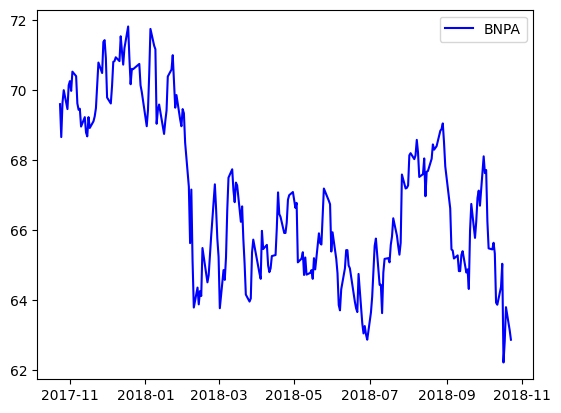

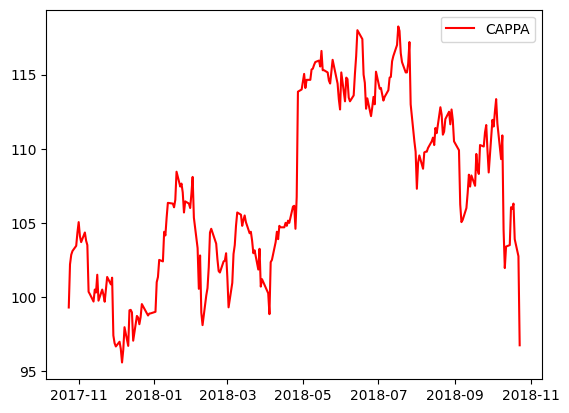

In [4]:
# import mplfinance as mpf

# # Plot the candlestick chart for BNPA
# mpf.plot(bnpa_df, type='candle', title='Stock Prices - BNPA')

# plt.show()

# # Plot the candlestick chart for CAPPA
# mpf.plot(cappa_df, type='candle', title='Stock Prices - CAPPA')

# # Show the plot
# plt.show()

# Plot the data from bnpa_df
plt.plot(bnpa_df.index, bnpa_df['Close'], label='BNPA', color='blue')

# Set the title, x-axis label, and y-axis label
# plt.set_title('Stock Prices')
# plt.set_xlabel('Date')
# plt.set_ylabel('Close Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Plot the data from cappa_df
plt.plot(cappa_df.index, cappa_df['Close'], label='CAPPA', color='red')

# Set the title, x-axis label, and y-axis label
# plt.set_title('Stock Prices')
# plt.set_xlabel('Date')
# plt.set_ylabel('Close Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()



3.3. Compute the return for both stocks and for the CAC40 index. Comment on your results.

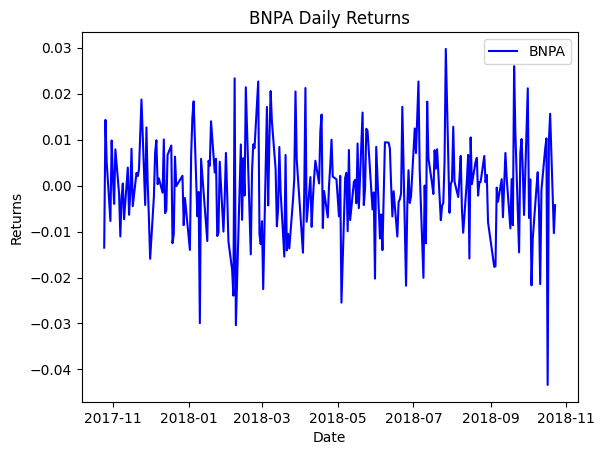

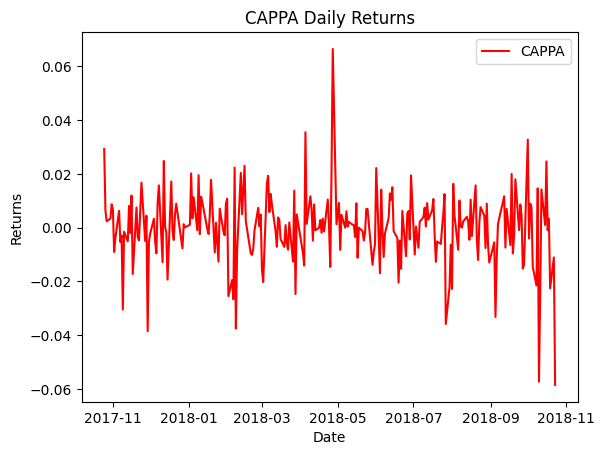

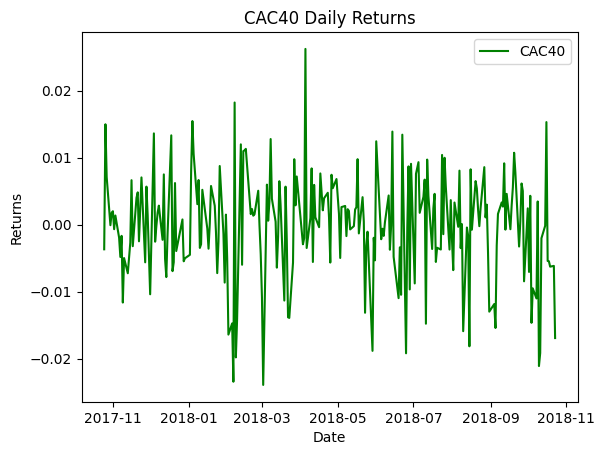

In [8]:
# Compute daily returns
bnpa_daily_returns = bnpa_df['Close'].pct_change()
cappa_daily_returns = cappa_df['Close'].pct_change()
cac40_daily_returns = fchi_df['Close'].pct_change()

# Plot daily returns for BNPA
plt.plot(bnpa_daily_returns.index, bnpa_daily_returns, label='BNPA', color='blue')
plt.title('BNPA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot daily returns for CAPPA
plt.plot(cappa_daily_returns.index, cappa_daily_returns, label='CAPPA', color='red')
plt.title('CAPPA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot daily returns for CAC40
plt.plot(cac40_daily_returns.index, cac40_daily_returns, label='CAC40', color='green')
plt.title('CAC40 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


3.4. Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3.
Plot the histograms and comment on your results


In [18]:
import pandas as pd
from scipy.stats import skew 
from scipy.stats import kurtosis 

# Compute the skewness of the daily returns
bnpa_skewness = skew(bnpa_daily_returns.dropna())
cappa_skewness = skew(cappa_daily_returns.dropna())
cac40_skewness = skew(cac40_daily_returns.dropna())

# Compute the kurtosis of the daily returns
bnpa_kurtosis = kurtosis(bnpa_daily_returns.dropna())
cappa_kurtosis = kurtosis(cappa_daily_returns.dropna())
cac40_kurtosis = kurtosis(cac40_daily_returns.dropna())

# Create a dataframe with the skewness and kurtosis values
data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
  'Skewness': [bnpa_skewness, cappa_skewness, cac40_skewness],
  'Kurtosis': [bnpa_kurtosis, cappa_kurtosis, cac40_kurtosis]}

df_skew_kurt = pd.DataFrame(data)
df_skew_kurt


,Stock,Skewness,Kurtosis
0,BNPA,-0.261981,0.910156
1,CAPPA,-0.323975,4.147156
2,CAC40,-0.345872,0.661933


Distribution on the basis of skewness value:

- **Skewness = 0**: The distribution is normally distributed.
- **Skewness > 0**: There is more weight in the left tail of the distribution.
- **Skewness < 0**: There is more weight in the right tail of the distribution.

Kurtosis in distributions:

- The kurtosis for a normal distribution is equal to 3.
- **Kurtosis < 3**: The distribution is called platykurtic.
- **Kurtosis > 3**: The distribution is called leptokurtic. This signifies that it produces more outliers than the normal distribution.

3.5. Compute the standard errors of the return for both stocks for the full period and then for 3
sub-periods of equal size. Is volatility constant?


In [22]:
# Compute the standard errors of the return for the full period
bnpa_std_full_error = bnpa_daily_returns.std()
cappa_std_full_error = cappa_daily_returns.std()
cac40_std_full_error = cac40_daily_returns.std()

# Divide the daily returns into three periods
bnpa_returns_periods = np.array_split(bnpa_daily_returns, 3)
cappa_returns_periods = np.array_split(cappa_daily_returns, 3)
cac40_returns_periods = np.array_split(cac40_daily_returns, 3)

# Calculate the standard deviation of each period
bnpa_std_periods = [period.std() for period in bnpa_returns_periods]
cappa_std_periods = [period.std() for period in cappa_returns_periods]
cac40_std_periods = [period.std() for period in cac40_returns_periods]

# Print the standard deviation of each period
# Create a dictionary with the data
data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Full Period': [bnpa_std_full_error, cappa_std_full_error, cac40_std_full_error],
        'Period 1': [bnpa_std_periods[0], cappa_std_periods[0], cac40_std_periods[0]],
        'Period 2': [bnpa_std_periods[1], cappa_std_periods[1], cac40_std_periods[1]],
        'Period 3': [bnpa_std_periods[2], cappa_std_periods[2], cac40_std_periods[2]]}

# Create the dataframe
df = pd.DataFrame(data)

# Show the dataframe
df


,Stock,Full Period,Period 1,Period 2,Period 3
0,BNPA,0.010716,0.010667,0.010481,0.011111
1,CAPPA,0.013675,0.013089,0.012648,0.015138
2,CAC40,0.007846,0.007851,0.007796,0.007970


3.6. Compute the correlation between each stock and the CAC40. Comment on your results.


3.7. Compute the returns of a portfolio in which both stocks have an equal weight. Compute
the average return and the standard deviation over the whole sample period. Comment on
your results.


3.8. Consider a portfolio with one stock and the risk-free interest rate (you can choose the
stock out of the two that are available). What is the optimal portfolio allocation between these
two assets for an investor with a utility function presented in the course and A=1.5?


3.9. Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component;
portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of question 3.7.
These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio
are inefficient?


3.10. Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the
Sterling ratio. Why are there differences between these ratios?


3.12. Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.


3.12. Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results.

#### Question 4
Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, …) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market?